In [52]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [53]:
# Loading the dataset
data=pd.read_csv("wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [54]:
data.shape

(178, 14)

In [55]:
#  info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [56]:
#  stastical summary
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [57]:
data.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [58]:
#Visualizations

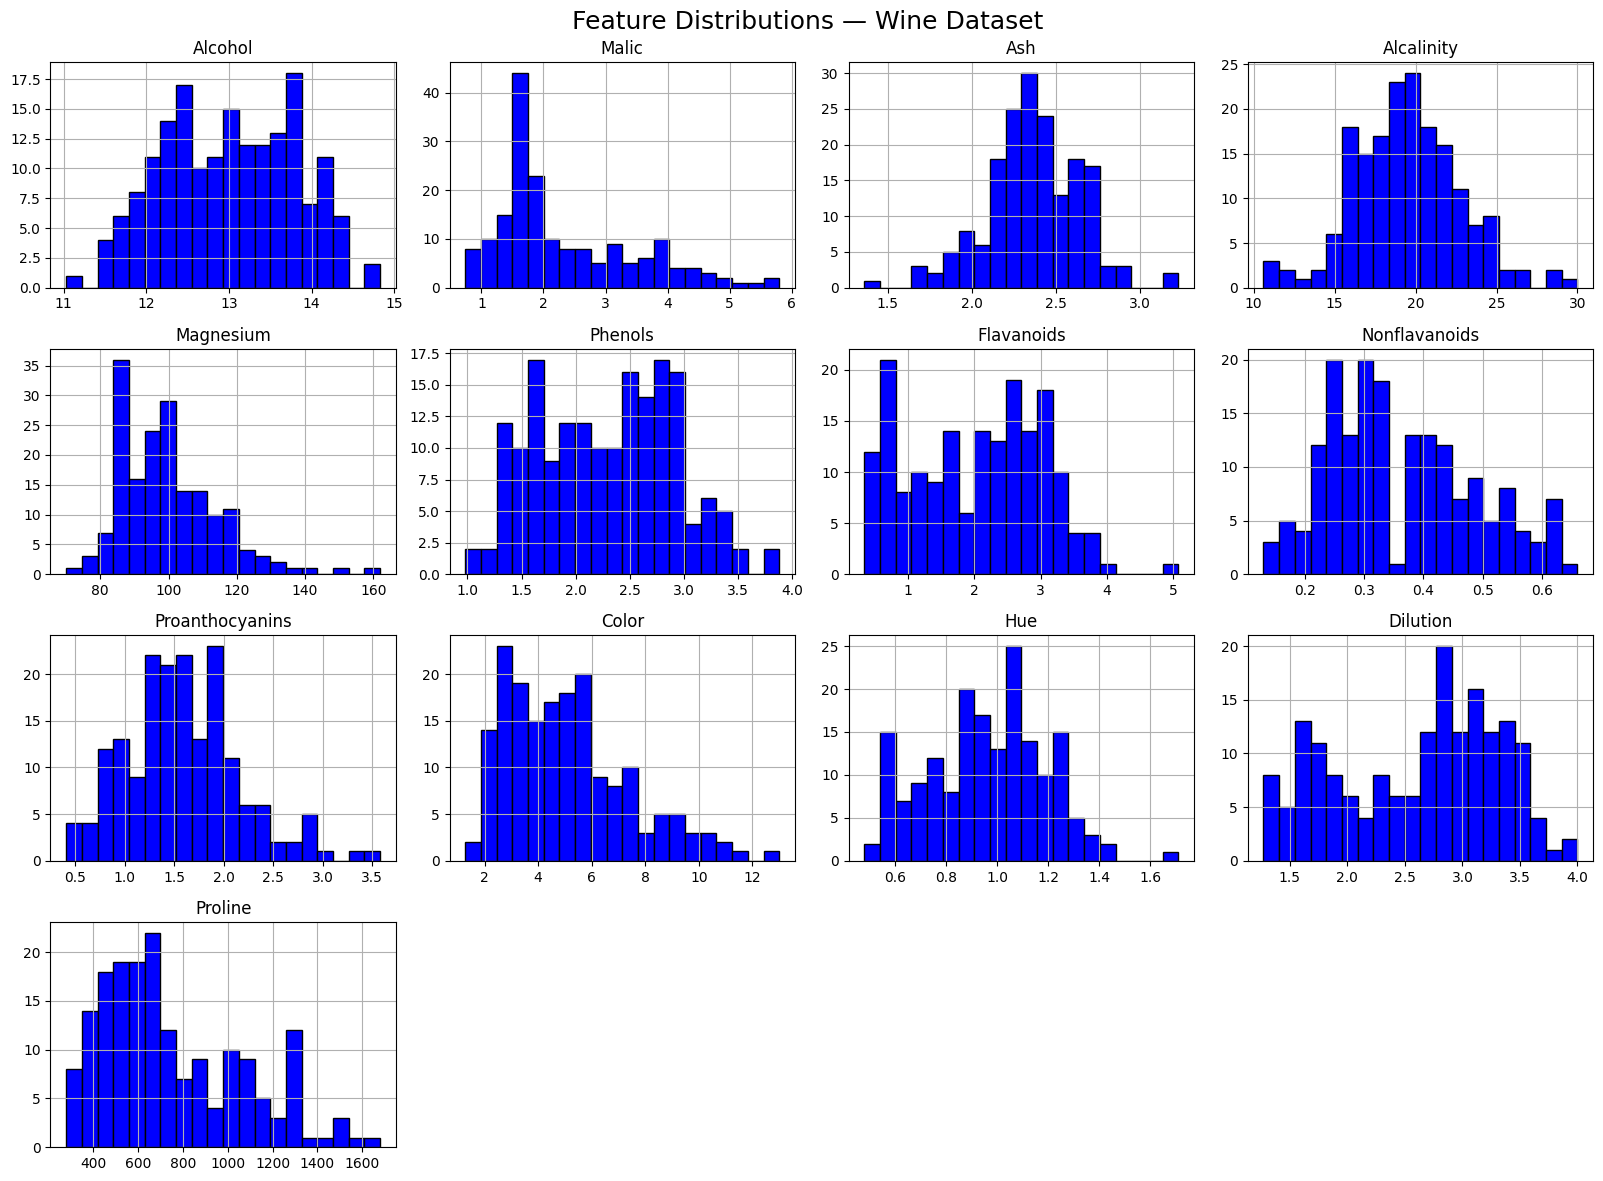

In [59]:
# All features at once — I’m scanning how values are spread
data.drop('Type', axis=1).hist(figsize=(16, 12), bins=20, color='blue', edgecolor='black')
plt.suptitle("Feature Distributions — Wine Dataset", fontsize=18)
plt.tight_layout()
plt.show()



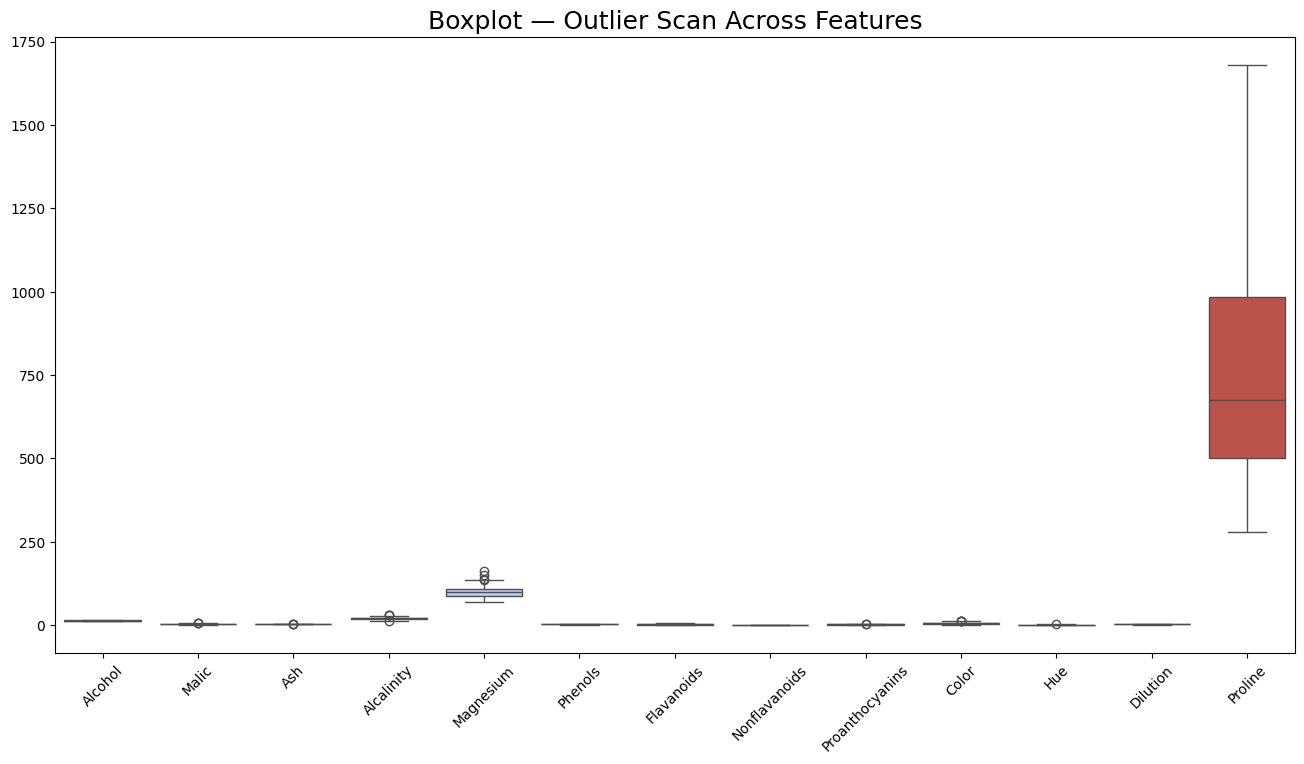

In [60]:
# One box per feature — I’m catching outliers and spread
plt.figure(figsize=(16, 8))
sns.boxplot(data=data.drop('Type', axis=1), palette='coolwarm')
plt.title("Boxplot — Outlier Scan Across Features", fontsize=18)
plt.xticks(rotation=45)
plt.show()


In [61]:
# I’m keeping the outliers — they may carry meaningful signal, especially for rare wine types or edge cases

In [62]:
# calculating the skewness
data.skew()

,0
Type,0.107431
Alcohol,-0.051482
Malic,1.039651
Ash,-0.176699
Alcalinity,0.213047
Magnesium,1.098191
Phenols,0.086639
Flavanoids,0.025344
Nonflavanoids,0.450151
Proanthocyanins,0.517137


In [63]:
#most positively skewed and negatively skewed .   #Here most of the features are postively skewed and few are negatively skewed.

In [64]:
# calculating the correlation
corr=data.corr("pearson")
corr

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


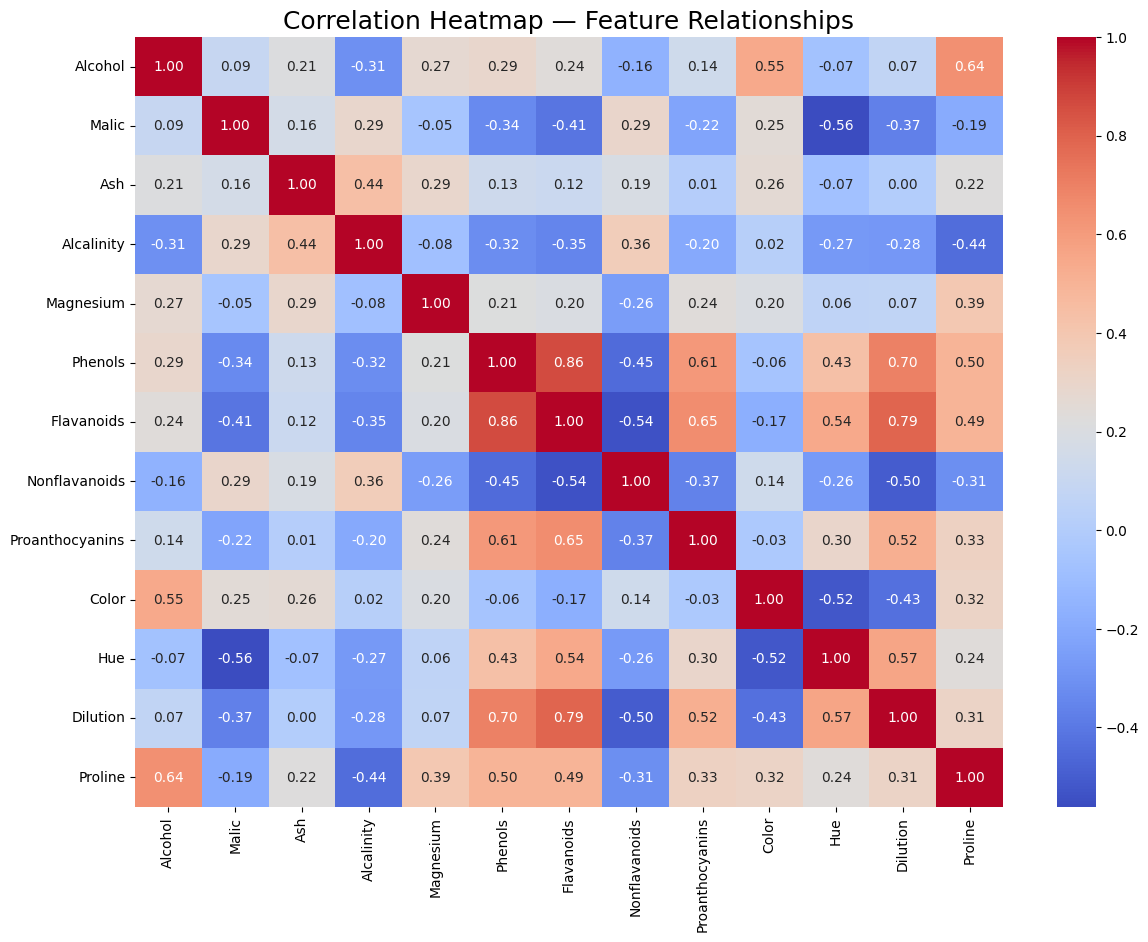

In [65]:
# I’m revealing hidden relationships between features
plt.figure(figsize=(14, 10))
sns.heatmap(data.drop('Type', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap — Feature Relationships", fontsize=18)
plt.show()


In [66]:
# Here phenols,Flavanoids are high correlated and remaining all are moderately correalted.

In [67]:
# usually we drop Type feature in the dataset
# because it is not important,clustering is done the remaining features
# data.drop(["Type"],axis=1,inplace=True)

In [68]:
# standardizing the dataset
data1=scale(data)
data=pd.DataFrame(data1,columns=data.columns)
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [69]:
# I’m excluding the target column — PCA only needs features
X = data.drop('Type', axis=1)

# I’m standardizing — resetting all features to same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# I’m previewing the scaled data — converted back to DataFrame
scaled_df=pd.DataFrame(X_scaled, columns=X.columns)

In [70]:
scaled_df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [71]:
# I’m applying PCA to preserve 95% of the variance
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(X_scaled)

# I’m checking how many components were selected
print("Number of components selected:", pca.n_components_)

Number of components selected: 10


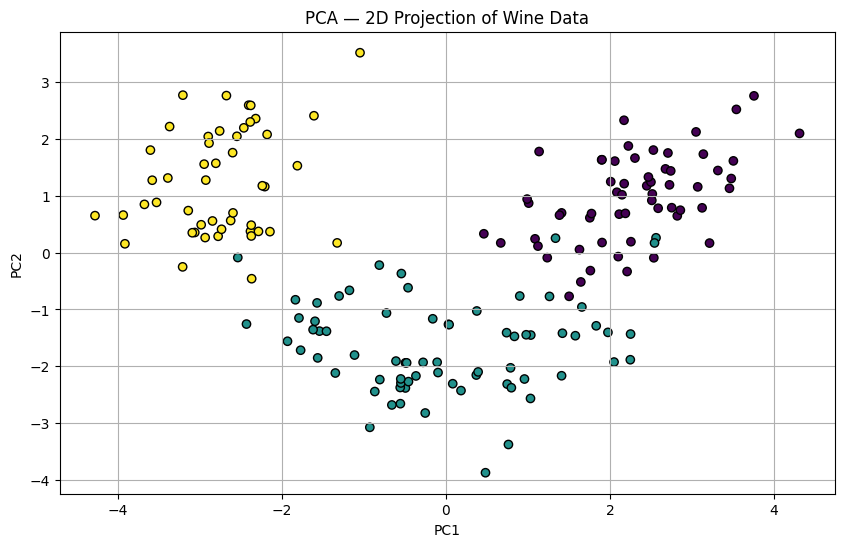

In [72]:
# I’m reducing to 2 components for visualization
pca_vis = PCA(n_components=2)
pca_2d = pca_vis.fit_transform(X_scaled)

# I’m plotting the PCA output — colored by wine Type
plt.figure(figsize=(10,6))
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=data['Type'], cmap='viridis', edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA — 2D Projection of Wine Data")
plt.grid(True)
plt.show()

In [73]:
# applying K-Means on scaled original data — not PCA
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

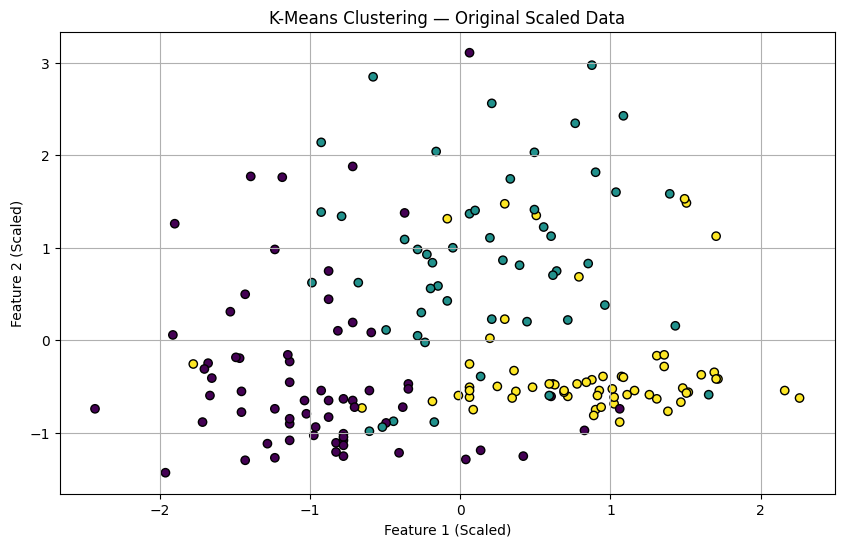

In [74]:
# plotting clusters using first two original features for simplicity
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans_labels, cmap='viridis', edgecolor='k')
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.title("K-Means Clustering — Original Scaled Data")
plt.grid(True)
plt.show()

In [75]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

#  calculating clustering metrics
sil_score = silhouette_score(X_scaled, kmeans_labels)
db_score = davies_bouldin_score(X_scaled, kmeans_labels)

print("Silhouette Score:", sil_score)
print("Davies–Bouldin Index:", db_score)

Silhouette Score: 0.2848589191898987
Davies–Bouldin Index: 1.3891879777181646


In [76]:
# Applying K-Means on PCA-reduced data (10 components)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_labels = kmeans_pca.fit_predict(pca_data)

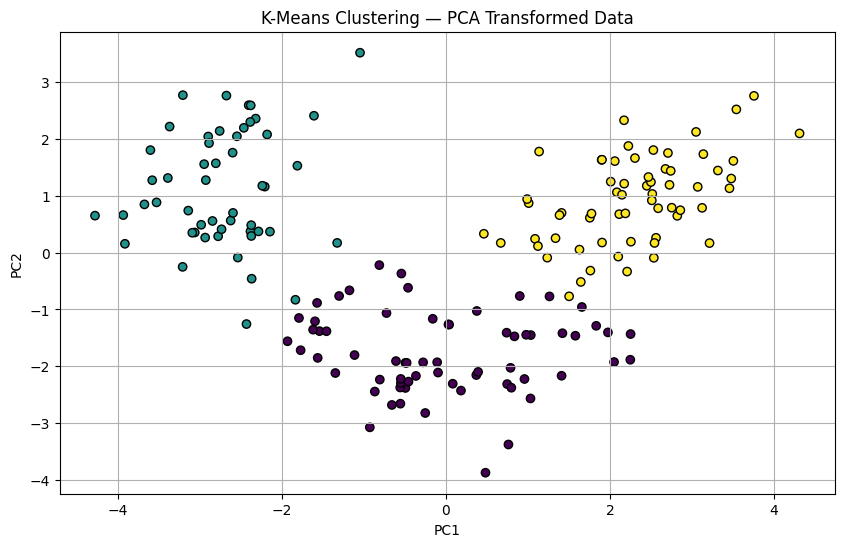

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=pca_labels, cmap='viridis', edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering — PCA Transformed Data")
plt.grid(True)
plt.show()



In [78]:
sil_pca = silhouette_score(pca_data, pca_labels)
db_pca = davies_bouldin_score(pca_data, pca_labels)

print("Silhouette Score (PCA):", sil_pca)
print("Davies–Bouldin Index (PCA):", db_pca)


Silhouette Score (PCA): 0.29867482943692897
Davies–Bouldin Index (PCA): 1.336326333515576


In [79]:
pd.crosstab(data['Type'], pca_labels)


col_0,0,1,2
Type,,,
-1.213944,0,0,59
0.079960,65,3,3
1.373864,0,48,0


In [80]:
# Clustering on PCA-transformed data gave slightly better results than original scaled data.
# Silhouette score improved from 0.2848 to 0.2986, and DB index dropped from 1.3891 to 1.3363.
# PCA helped remove noise and redundant features, which made the clusters more compact and clear.
# Crosstab showed better alignment with actual wine types when clustering was done on PCA data.
# PCA improves clarity and performance, but the original features carry more meaning and interpretability.
# Final choice depends on whether we prioritize clustering clarity or feature-level understanding.

In [81]:
# This assignment explored clustering performance using both original scaled data and PCA-transformed data.
# PCA improved clustering clarity slightly, with better silhouette score and lower DB index.
# Crosstab results showed stronger alignment with actual wine types when clustering was done on PCA data.
# PCA helps simplify high-dimensional data, making clustering faster and more interpretable.
# However, PCA components lose original feature meaning, which may affect domain-level insights.
# Recommendation: Use PCA when speed and clarity are important, especially for visualization or noisy data.
# Use original features when interpretability and domain meaning are critical for decision-making.
